In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Salary_Data.csv")

df = df.drop_duplicates()
df = df.dropna()

In [4]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [5]:

# X = train_df[['Years of Experience','Age']].values
X = train_df[['Years of Experience']].values
Y = train_df['Salary'].values

X = X * 0.01
Y = Y * 0.001

n_features = X.shape[1]

W = np.full((n_features,1),0)

In [6]:
def gradient(ax,ay,w,b):
  n_ex = ax.shape[0]
  ay = ay.reshape(-1,1)
  # print(ay.shape)
  f = (np.dot(ax,w) + b) - ay
  f = f.reshape(1,-1)


  w = (np.dot(f,ax).T)/n_ex
  # f = f.flatten()
  b = np.sum(f)/n_ex

  return w,b


def gradient_descent(x,y,w,alpha,epochs):
  b = 0

  for i in range(epochs):
    gradient_w , gradient_b = gradient(x, y, w, b)
    w = w - alpha * gradient_w
    b = b - alpha * gradient_b
  return w, b


[[608.90208439]] 57.727711580630725


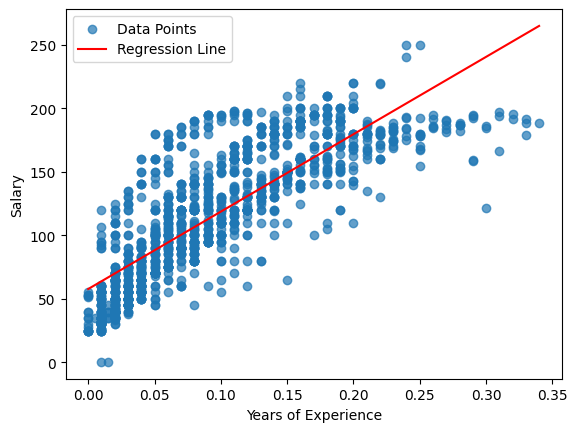

In [7]:

final_w,final_b = gradient_descent(X,Y,W,0.1,10000)
print(final_w,final_b)

plt.scatter(X,Y, label = 'Data Points',alpha=0.7)
x_vals = np.linspace(min(X),max(X),100)
y_vals = final_w[0] * x_vals + final_b

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(x_vals,y_vals, label= 'Regression Line', color= 'red')
plt.legend()
plt.show()